# Insurance Claims- Fraud Detection

## Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Insurance Claim Fraud Detection.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

This dataset has 1000 rows and 40 columns.

### Checking for null values

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df=df.drop('_c39',axis=1)

Dropped '_c39' is it had all the null values.

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

This dataset has mixed values of integer, object and float.

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


We can observe following things from above statistics:

Outliers and Skewness presence is possible when there is a considerable difference between 75% and max is high.

Below columns might possibly have outliers and skewness.

- months_as_customer
- policy_annual_premium
- umbrella_limit
- capital-gains
- total_claim_amount
- injury_claim
- property_claim

## Checking for unique values

In [8]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

We will drop some columns as it has more than 95% of unique values which will make the data biased.

In [9]:
df=df.drop(columns = ['policy_number', 'incident_location', 'policy_annual_premium', 'policy_bind_date', 'insured_zip'], axis = 1)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,0,MALE,MD,craft-repair,sleeping,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,5000000,MALE,MD,machine-op-inspct,reading,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,5000000,FEMALE,PhD,sales,board-games,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,6000000,FEMALE,PhD,armed-forces,board-games,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,6000000,MALE,Associate,sales,board-games,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,0,FEMALE,Masters,craft-repair,paintball,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,0,FEMALE,PhD,prof-specialty,sleeping,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,3000000,FEMALE,Masters,armed-forces,bungie-jumping,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,5000000,MALE,Associate,handlers-cleaners,base-jumping,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


### Analyzing Distribution of both Target and Feature Columns

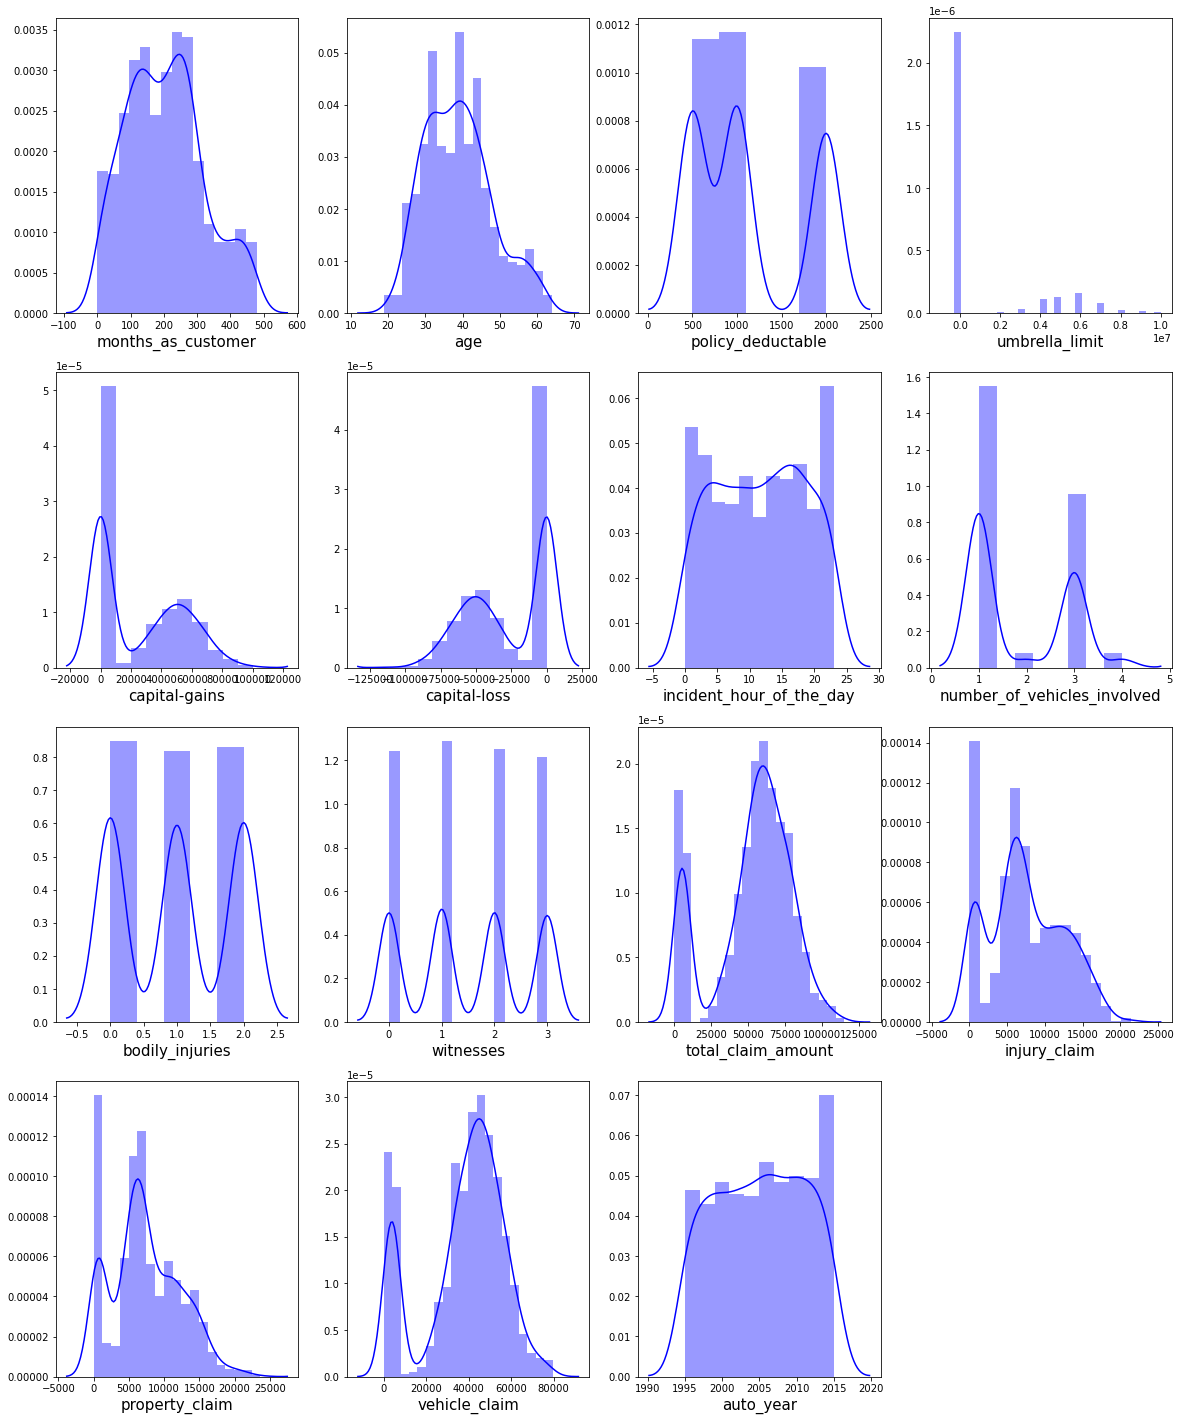

In [10]:
plt.figure(figsize = (20,25), facecolor='white')
plot_number = 1
for i in df[['months_as_customer', 'age' , 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
                            'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
                            'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]:
    if plot_number <=35:
        plt.subplot(4,4,plot_number)
        sns.distplot(df[i], color = 'blue')
        plt.xlabel(i,fontsize = 15)
    plot_number+=1
plt.show()


As we can see most of the columns have normal distribution.

In [11]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

After reviewing found umbrella_limit, total_claim_amount, vehicle_claim Columns data are skewed, i.e out of -0.50 to +0.50 range.

## Exploratory Data Analysis

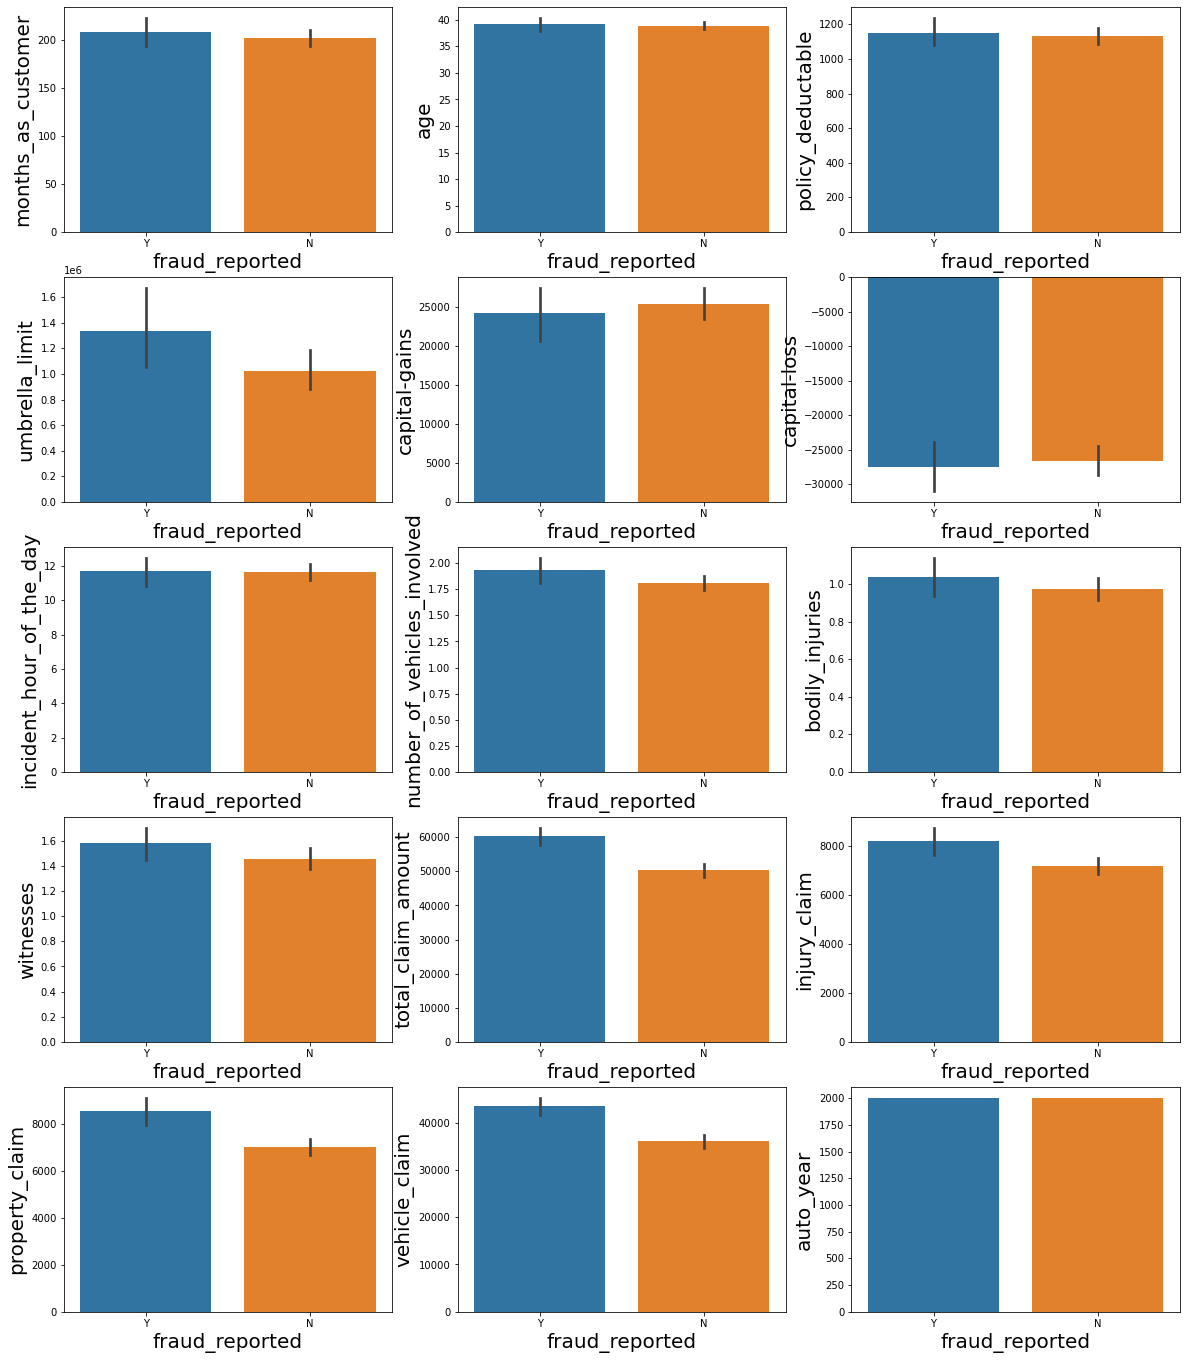

In [15]:
plt.figure(figsize=(20,24),facecolor='white')
plot_number=1
x_plot = df[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]
y_plot = df['fraud_reported']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        ax=plt.subplot(5,3,plot_number)
        sns.barplot(y_plot,x_plot[i])
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

Most of the Continous data columns doesnt affect the target variable much. Only below listed column have an impact

- Higher umbrella_limit has more fraud claims.

- Higher total_claim_amount has more fraud claims.

- Higher injury_claim amount has more fraud claims.

- Higher property_claim amount has more fraud claims.

- Higher vehicle_claim amount has more fraud claims.

- Rest of the columns relationship with target variable is almost same and not much contributive in prediction.

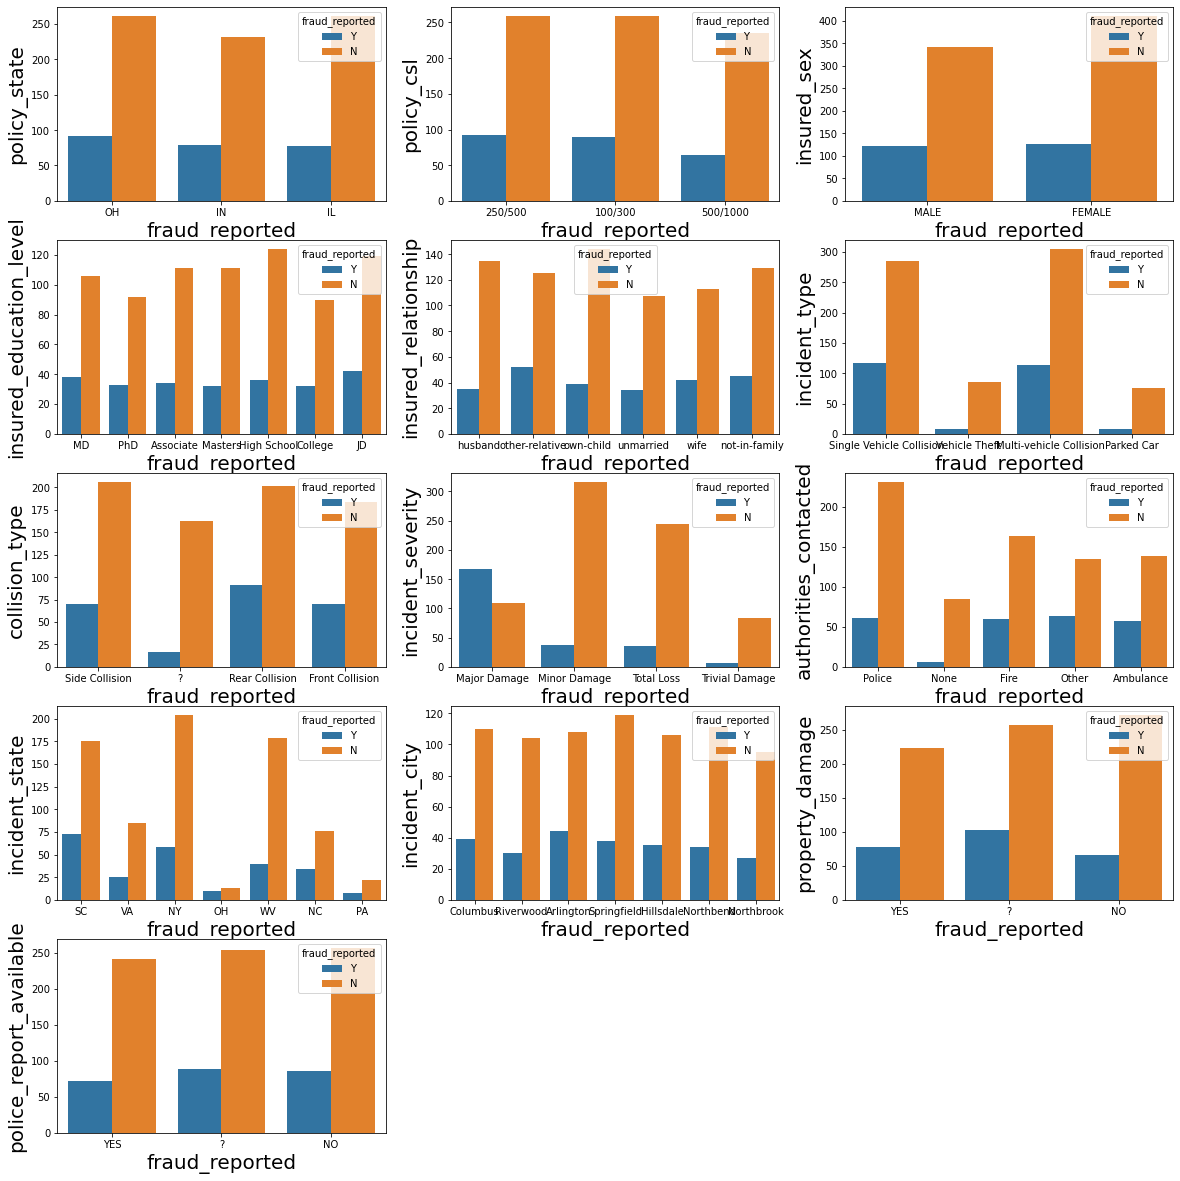

In [16]:
plt.figure(figsize=(20,25),facecolor='white')
plot_number=1
x_plot = df[['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_type',
             'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city',
             'property_damage', 'police_report_available']]
y_plot = df['fraud_reported']
for i in x_plot:
    if plot_number<=len(x_plot.columns):
        plt.subplot(6,3,plot_number)
        sns.countplot(x_plot[i], hue=y_plot)
        plt.xlabel('fraud_reported',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plot_number+=1
plt.show()

Here we can observe following details:

- policy_state - OH and IL state claims has higher count of genuine claims. Fraud claims range is almost same which means it doesn't contribute much for fraud claims

- policy_csl - 250/500 and 100/300 CSL has higher count of genuine claims. Fraud claims range is almost same which means it doesn't contribute much for fraud claims

- insured_sex - Female Insured Claims has higher count of genuine claims. Fraud claims range is almost same which means it doesn't contribute much for fraud claims

- insured_education_level - claims of Insured with educational level High school has higher count of genuine claims. Fraud claims range is almost same which means it doesn't contribute much for fraud claims

- insured_relationship - Own-child insured relationship has higher count of genuine claims. other-relative relationship followed by not-in-family has higher count of Fraud claims.

- incident_type - Multi-vehicle Collision has higher count of genuine claims followed by Single Vehicle Collision. Same incident type also has higher count of Fraud claims.

- collision_type - Rear Collision has higher count of genuine claims. Same collision type also has higher count of Fraud claims.

- incident_severity - Minor Damage Severity type has higher count of genuine claims followed by Total Loss severity type. Major Damage severity type has higher count of Fraud claims.

- authorities_contacted - Claims where police authority are contacted has higher count of genuine claims.

- incident_state - NY state incident claims has higher count of genuine claims followed by SC and WV state incident claims. SC state incident claims has higher count of Fraud claims.

- incident_city - Springfield city incident claims has higher count of genuine claims. Arlington city incident claims has higher count of Fraud claims.

- property_damage - No Property damage claims has higher count of genuine claims.

- police_report_available - Most of the columns has No police report available so genuine and fraud claims count is higher in case when there is no police report available.

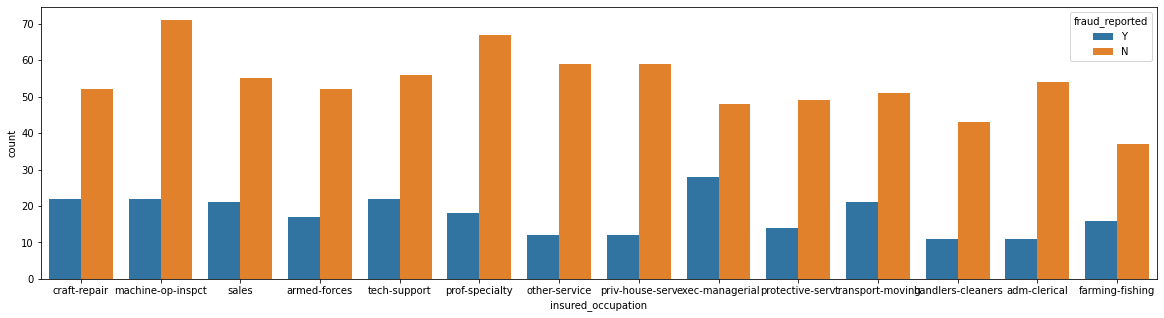

In [18]:
plt.figure(figsize=(20,5),facecolor='white')
sns.countplot(df['insured_occupation'], hue=df['fraud_reported'])

Claims with insured occupation as machine-op-inspct has higher genuine claims followed by prof-specialty

Claims with insured occupation as exec-mangerial has higher fraud claims

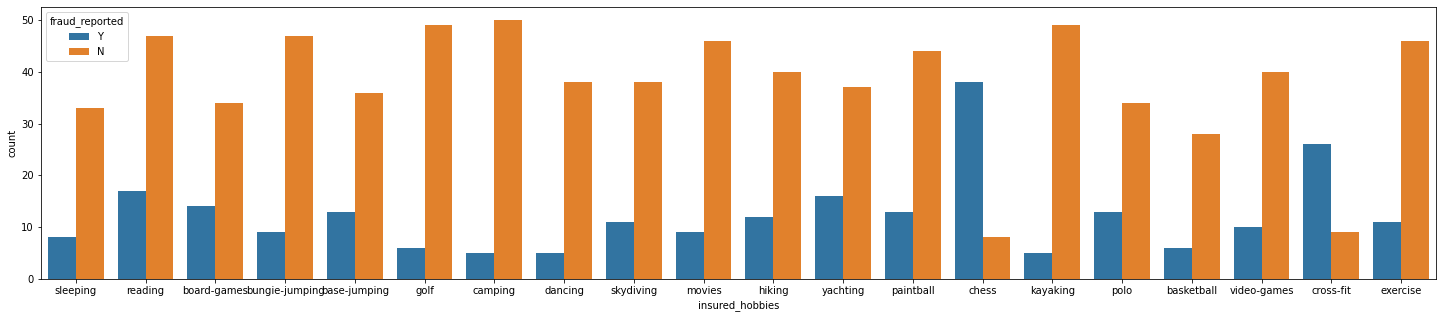

In [20]:
plt.figure(figsize=(25,5),facecolor='white')
sns.countplot(df['insured_hobbies'], hue=df['fraud_reported'])

Claims with insured hobbies camping has higher genuine claims count followed by kayaking

Claims with insured hobbies chess has higher fraud claims count followed by cross-fit

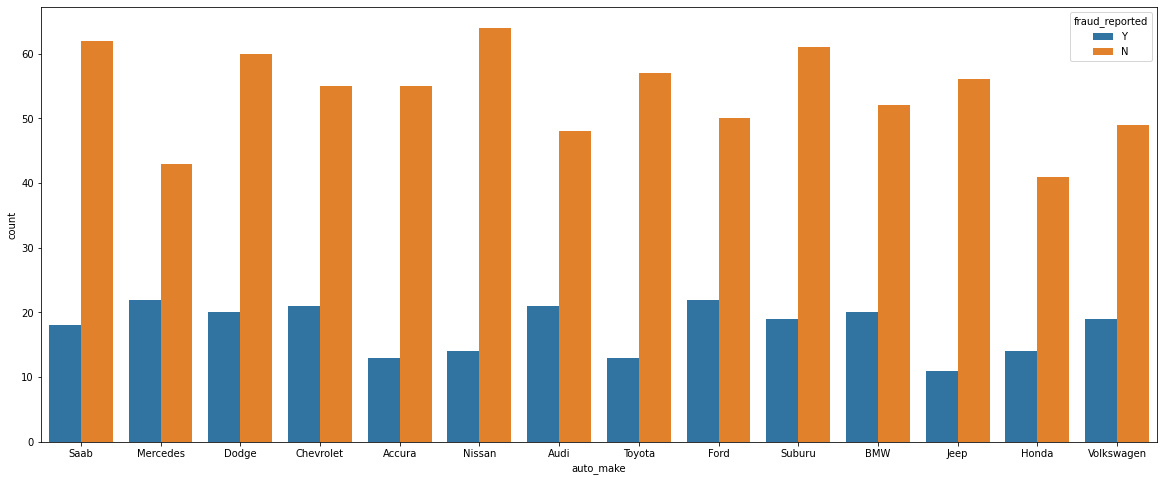

In [21]:
plt.figure(figsize=(20,8),facecolor='white')
sns.countplot(df['auto_make'], hue=df['fraud_reported'])

Claims with Automobile Make Nissan has higher genuine claims count followed by Saab, Suburu Auto Make.

Claims with Automobile Make Ford, Mercedes has higher fraud claims count.

In [22]:
df['auto_model'].value_counts()

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
Legacy            32
A5                32
Pathfinder        31
Malibu            30
92x               28
Forrestor         28
Camry             28
E400              27
F150              27
95                27
93                25
Grand Cherokee    25
Tahoe             24
Maxima            24
Escape            24
Ultima            23
X5                23
Civic             22
Highlander        22
Silverado         22
Fusion            21
CRV               20
ML350             20
Corolla           20
Impreza           20
TL                20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

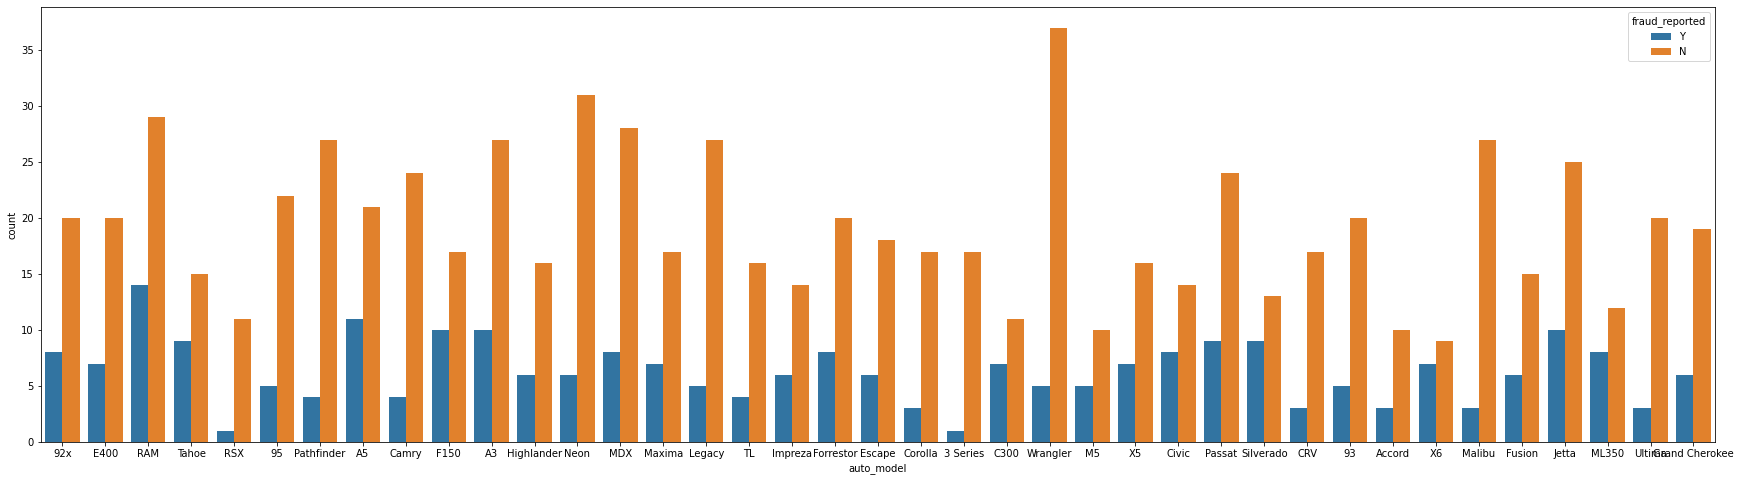

In [23]:
plt.figure(figsize=(30,8),facecolor='white')
sns.countplot(df['auto_model'], hue=df['fraud_reported'])

Wrangler auto model involved claims has higher genuine claims count followed by nissan and RAM auto model.

RAM auto model involved claims has higher fraud claims count followed A5 auto model.

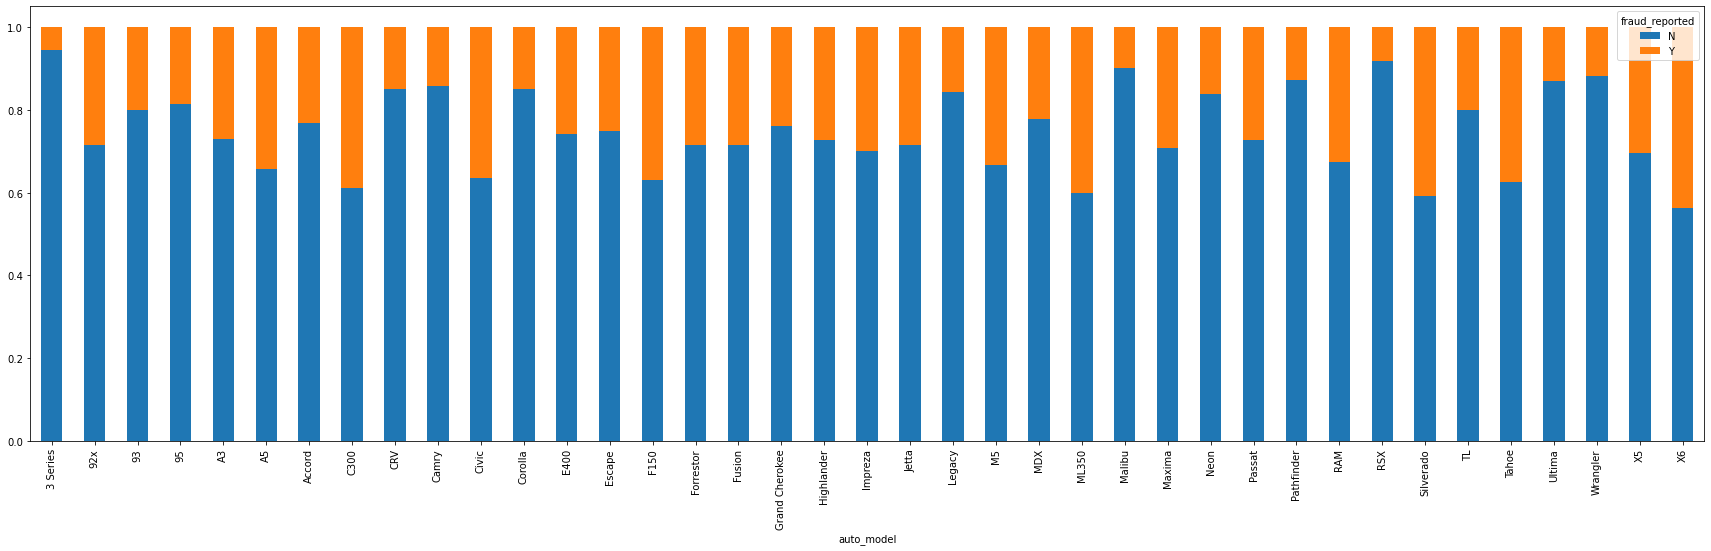

In [24]:
auto_model = pd.crosstab(df['auto_model'],df['fraud_reported'])
auto_model.div(auto_model.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, figsize=(30,8))

from above crosstab comparision we can observe highest percentage of genuine and fraud claims in each auto model.

3 Series followed RSX has higher percentage of genuine claims.

ML350 followed by Silverado has higher percentage of fraud claims.

### Encoding the Categorical Data using LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['policy_state'] = le.fit_transform(df['policy_state'])
df['policy_csl'] = le.fit_transform(df['policy_csl'])
df['insured_sex'] = le.fit_transform(df['insured_sex'])
df['insured_education_level'] = le.fit_transform(df['insured_education_level'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = le.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = le.fit_transform(df['insured_relationship'])
df['incident_date'] = le.fit_transform(df['incident_date'])
df['incident_type'] = le.fit_transform(df['incident_type'])
df['collision_type'] = le.fit_transform(df['collision_type'])
df['incident_severity'] = le.fit_transform(df['incident_severity'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['incident_state'] = le.fit_transform(df['incident_state'])
df['incident_city'] = le.fit_transform(df['incident_city'])
df['property_damage'] = le.fit_transform(df['property_damage'])
df['police_report_available'] = le.fit_transform(df['police_report_available'])
df['auto_make'] = le.fit_transform(df['auto_make'])
df['auto_model'] = le.fit_transform(df['auto_model'])
df['fraud_reported'] = le.fit_transform(df['fraud_reported'])

In [26]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,0,1,4,2,17,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,5000000,0,6,11,2,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,6000000,0,6,1,2,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,6000000,1,0,11,2,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,0,0,5,2,13,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,0,0,1000,0,0,6,9,17,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,2,1,500,3000000,0,5,1,3,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,62,0,2,2000,5000000,1,0,5,0,...,1,2,46980,5220,5220,36540,1,5,1998,0


We can observe that all the columns are now having numerical Data Type.

In [27]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1.101000e+06,0.463000,2.966000,6.653000,9.731000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,2.297407e+06,0.498879,1.948497,4.019048,5.674049,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,-1.000000e+06,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,0.000000e+00,0.000000,1.000000,3.000000,5.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,0.000000e+00,0.000000,3.000000,7.000000,10.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,0.000000e+00,1.000000,5.000000,10.000000,15.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,1.000000e+07,1.000000,6.000000,13.000000,19.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   months_as_customer           1000 non-null   int64
 1   age                          1000 non-null   int64
 2   policy_state                 1000 non-null   int32
 3   policy_csl                   1000 non-null   int32
 4   policy_deductable            1000 non-null   int64
 5   umbrella_limit               1000 non-null   int64
 6   insured_sex                  1000 non-null   int32
 7   insured_education_level      1000 non-null   int32
 8   insured_occupation           1000 non-null   int32
 9   insured_hobbies              1000 non-null   int32
 10  insured_relationship         1000 non-null   int32
 11  capital-gains                1000 non-null   int64
 12  capital-loss                 1000 non-null   int64
 13  incident_date                1000 non-null   int3

We analyzed the data and as we can see that we have all numerical data.

### Checking Correlation between each column

In [29]:
corr_mat=df.corr()
corr_mat

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.015498,0.060925,-0.000833,0.009814,-0.093661,...,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.018126,0.073337,0.000969,0.017220,-0.081315,...,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,...,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.021636,-0.010757,0.009153,0.015788,-0.005960,...,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,0.010870,-0.009733,0.015217,-0.046733,0.004061,...,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,1.000000,0.010688,-0.019357,0.023422,-0.037000,...,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.010688,1.000000,0.009002,-0.006160,-0.020317,...,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019357,0.009002,1.000000,-0.020298,0.021807,...,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.023422,-0.006160,-0.020298,1.000000,-0.011077,...,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,-0.006676,0.001564
insured_hobbies,-0.093661,-0.081315,-0.038689,-0.005960,0.004061,-0.037000,-0.020317,0.021807,-0.011077,1.000000,...,-0.033971,-0.045452,-0.004488,0.028393,0.012535,-0.016814,0.001525,0.030948,-0.014495,-0.046838


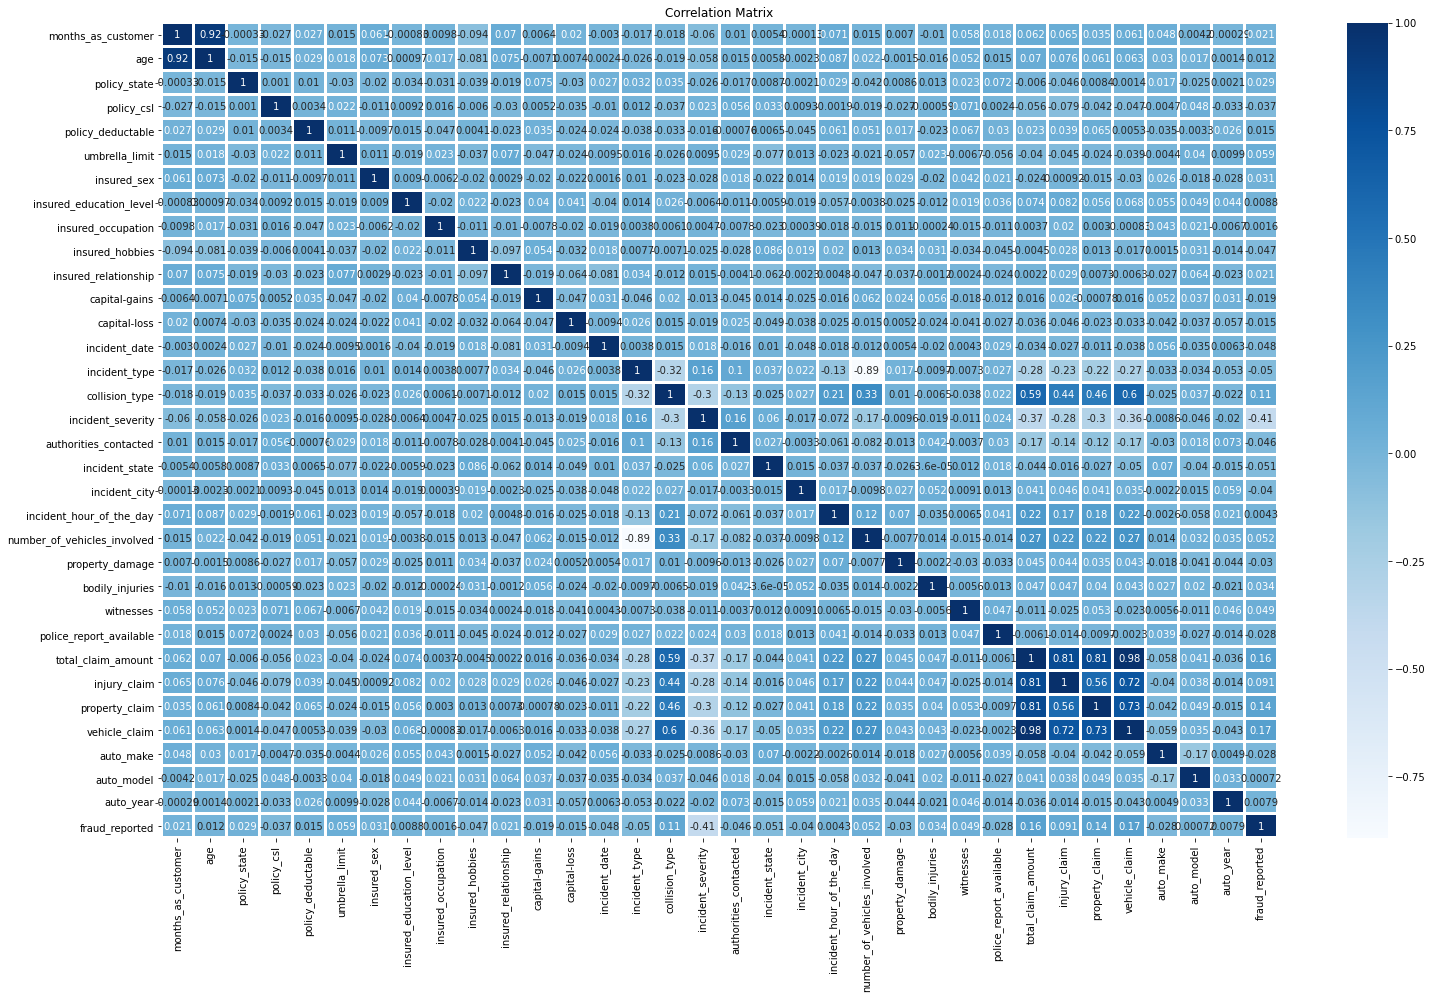

In [32]:
plt.figure(figsize=[25,15])
sns.heatmap(corr_mat,annot=True,cmap="Blues",linewidth=2)
plt.title("Correlation Matrix")
plt.show()

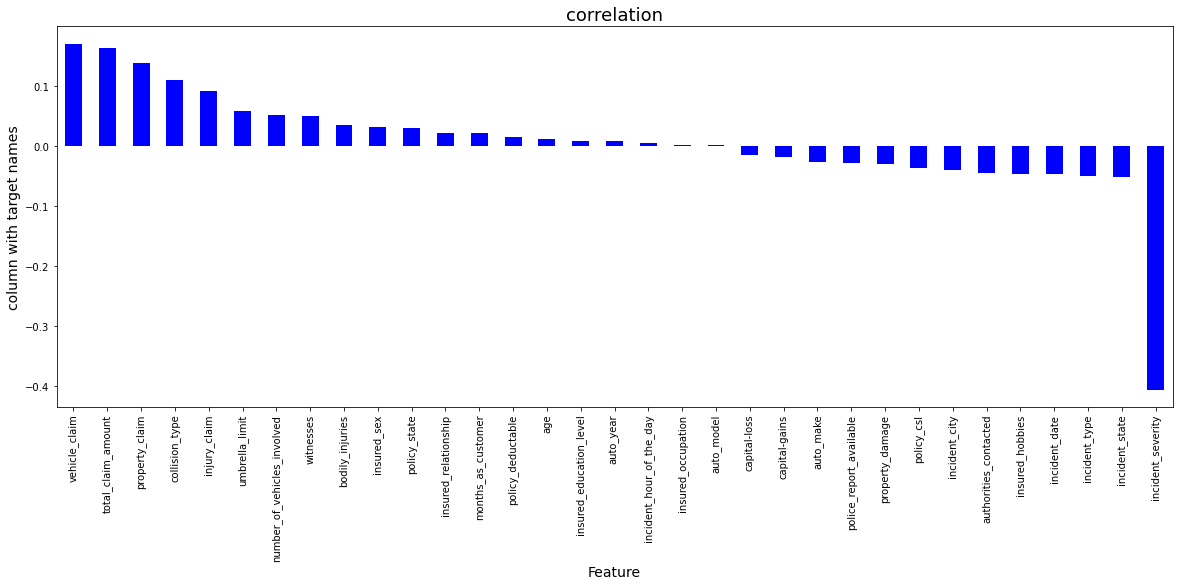

In [33]:
plt.figure(figsize=(20,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [34]:
corr_mat["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
capital-loss                  -0.014863
capital-gains                 -0.019173
auto_make                     -0.027519
police_report_available       -0.028159


Using Heatmap, Correlation Matrix we can conclude that prediction done earlier is almost true.

- Vehicle_claim, total_claim_amount, property_claim are the positively correlated Column with fraud_reported Column data

- Incident_severity is the negatively correlated Column with fraud_reported Column data.
- auto_model, insured_occupation, incident_hour_of_the_day, auto_year and insured_education_level are the least correlated column data. We can drop these columns if required at later stages for better Model Prediction.

### Checking for Outliers

In [35]:
x = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']
x_outlier=x.copy()
x_outlier

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1,1000,0,1,4,2,17,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,2,0,2000,5000000,0,6,11,2,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,0,1,2000,6000000,0,6,1,2,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,0,2,1000,6000000,1,0,11,2,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,0,0,5,2,13,...,0,1,0,87200,17440,8720,61040,6,6,2006
996,285,41,0,0,1000,0,0,6,9,17,...,2,3,0,108480,18080,18080,72320,13,28,2015
997,130,34,2,1,500,3000000,0,5,1,3,...,2,3,2,67500,7500,7500,52500,11,19,1996
998,458,62,0,2,2000,5000000,1,0,5,0,...,0,1,2,46980,5220,5220,36540,1,5,1998


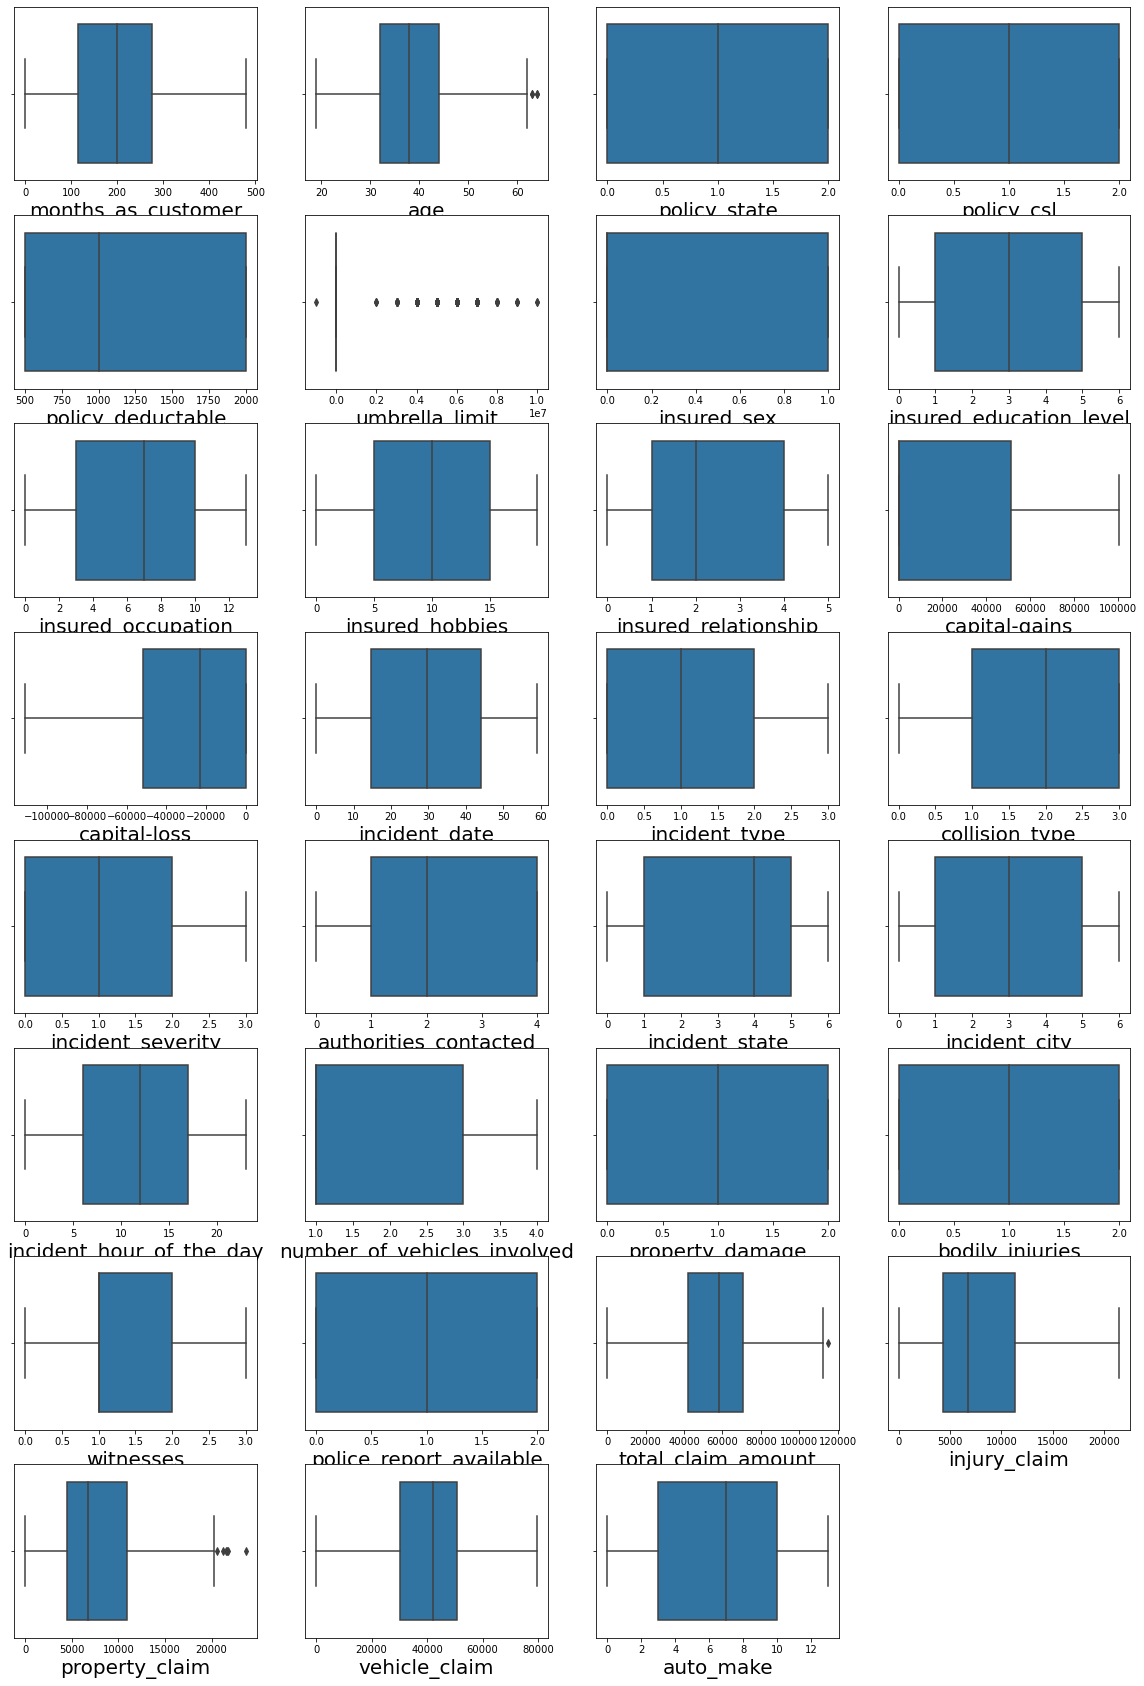

In [36]:
plt.figure(figsize=(20,30),facecolor='white')
plot_number3=1
for i in x_outlier:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_outlier[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

We can confirm that there are outliers in umbrella_limit.

We can also observe there is a presence of outliers in age, total_claim_amount, property_claim Column Data which are continous data originally

### Removing Outliers

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(x_outlier[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]))
x_zscore=x_outlier[(z<3).all(axis=1)]

In [38]:
x_zscore.shape

(983, 33)

In [39]:
x_outlier.shape

(1000, 33)

In [40]:
zscore_data_loss=((1000-983)/1000)*100
zscore_data_loss

1.7000000000000002

Upon analyzing, found 1.70% of Data loss is occured when ZScore Method is used for Outliers removal for this Data set. which is within acceptable range.

### Analyzing if outliers have been removed

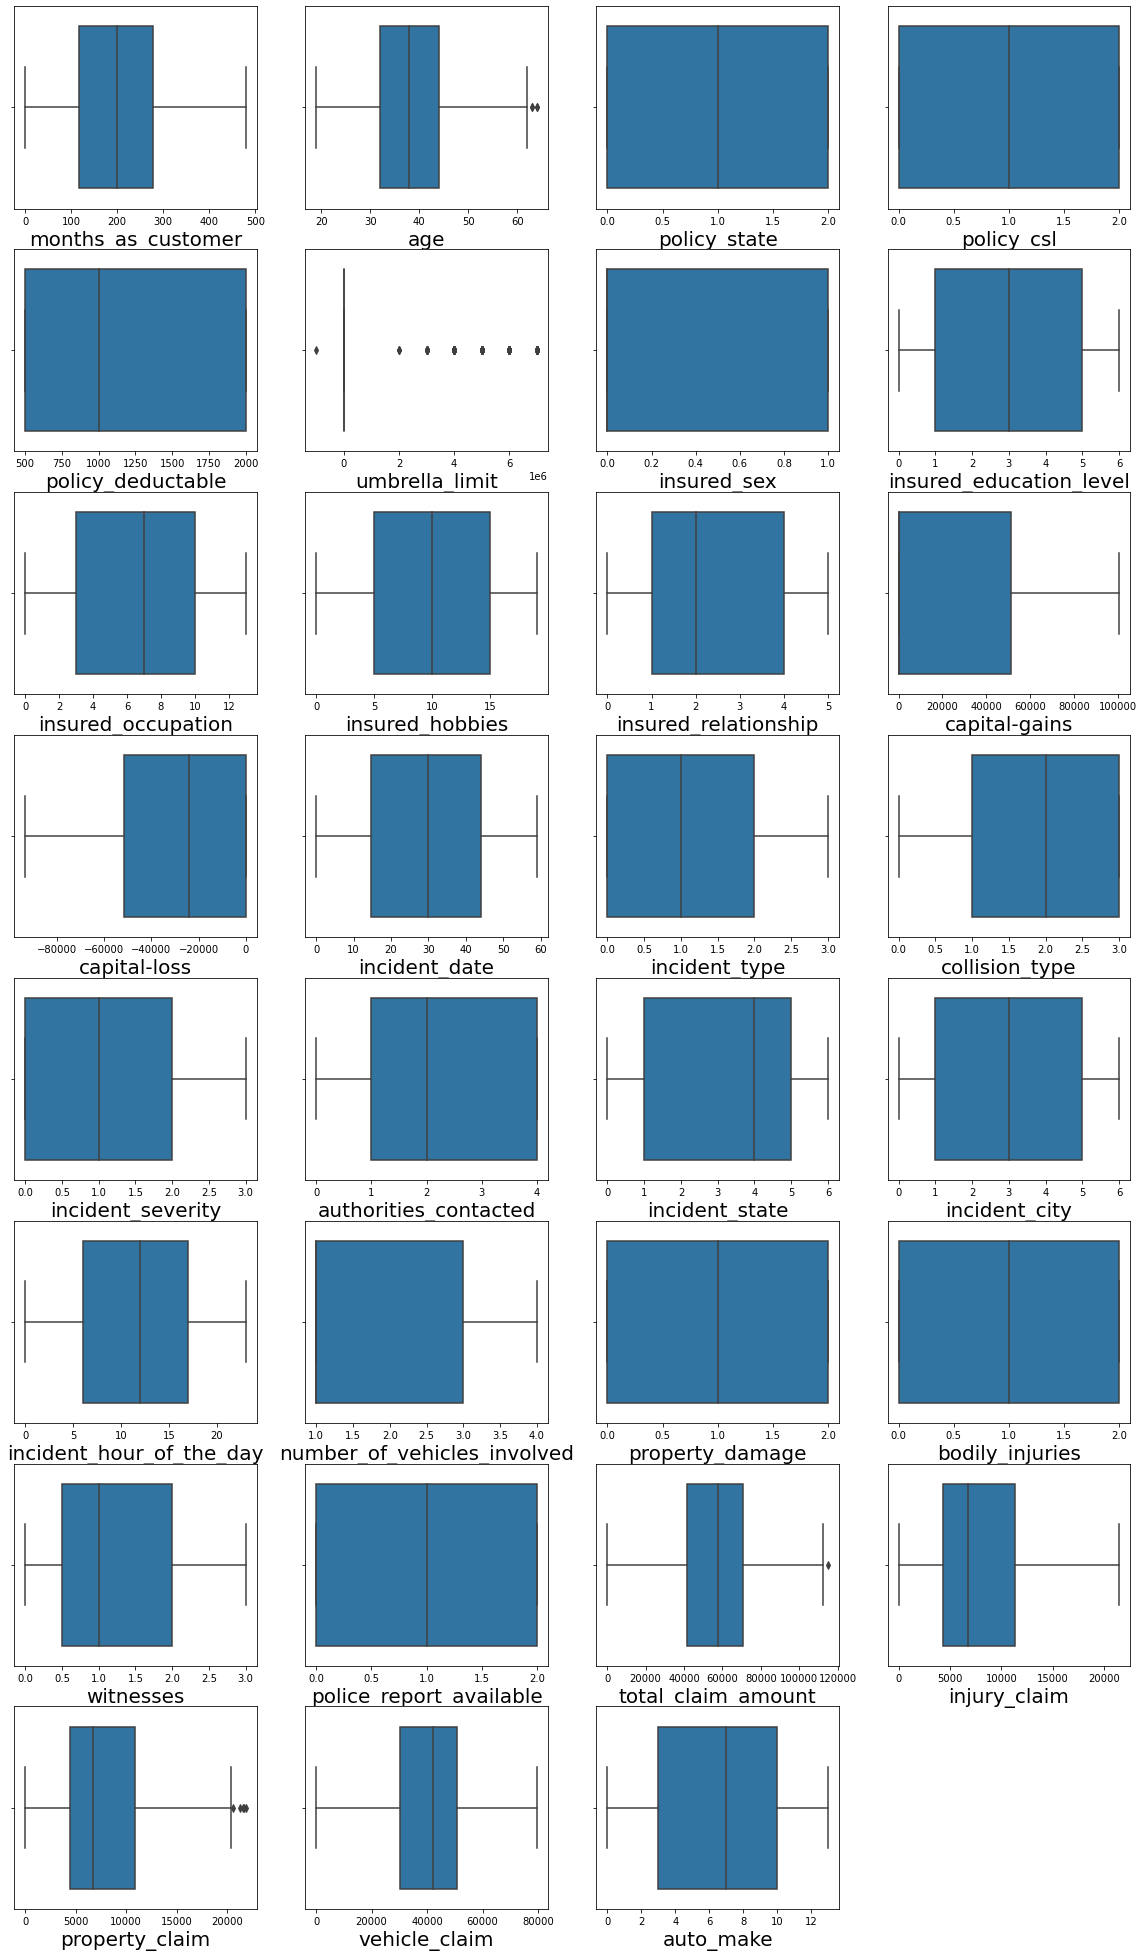

In [41]:
plt.figure(figsize=(20,35),facecolor='white')
plot_number3=1
for i in x_zscore:
    if plot_number3<=31:
        plt.subplot(8,4,plot_number3)
        sns.boxplot(x_zscore[i])
        plt.xlabel(i,fontsize=20)
    plot_number3+=1
plt.show()

Here we can observe significant amount of outliers is removed.

### Merging the outlier removed data with orignal data

In [42]:
drop_index = df.index.difference(x_zscore.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(983, 34)

We observed that Target variable is merged with outlier removed feature data set.

### Removing Skewness with CRBT Technique

In [48]:
df_cbrt = df.copy()
df_cbrt

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,0,1,4,2,17,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,5000000,0,6,11,2,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,6000000,0,6,1,2,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,6000000,1,0,11,2,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,3,38,2,2,1000,0,0,5,2,13,...,1,0,87200,17440,8720,61040,6,6,2006,0
979,285,41,0,0,1000,0,0,6,9,17,...,3,0,108480,18080,18080,72320,13,28,2015,0
980,130,34,2,1,500,3000000,0,5,1,3,...,3,2,67500,7500,7500,52500,11,19,1996,0
981,458,62,0,2,2000,5000000,1,0,5,0,...,1,2,46980,5220,5220,36540,1,5,1998,0


In [49]:
x = df_cbrt.drop(columns=['fraud_reported'])
y = df_cbrt['fraud_reported']
y.value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

In [50]:
x[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']].skew()

months_as_customer             0.366978
age                            0.478560
policy_deductable              0.479334
umbrella_limit                 1.806345
capital-gains                  0.469129
capital-loss                  -0.373733
incident_hour_of_the_day      -0.034313
number_of_vehicles_involved    0.510353
bodily_injuries                0.009371
witnesses                      0.021612
total_claim_amount            -0.594174
injury_claim                   0.268686
property_claim                 0.359799
vehicle_claim                 -0.620758
auto_year                     -0.054521
dtype: float64

After reviewing we found umbrella_limit, number_of_vehicles_involved, total_claim_amount, vehicle_claim columns has skewness outside the allowed range of -0.5 to +0.5

In [51]:
x1=x[['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount',
             'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']]

In [52]:
for index in x1.skew().index:
    if x1.skew().loc[index] >0.50:
        x1[index]=np.cbrt( x1[index])

In [53]:
x1.skew()

months_as_customer             0.366978
age                            0.478560
policy_deductable              0.479334
umbrella_limit                 1.608743
capital-gains                  0.469129
capital-loss                  -0.373733
incident_hour_of_the_day      -0.034313
number_of_vehicles_involved    0.432102
bodily_injuries                0.009371
witnesses                      0.021612
total_claim_amount            -0.594174
injury_claim                   0.268686
property_claim                 0.359799
vehicle_claim                 -0.620758
auto_year                     -0.054521
dtype: float64

After reviewing above set after skewness correction from CBRT Technique, found below observations,

- numbr_of_vehicles_involved Skewness are reduced and within -0.50 to +0.50 range
- umbrella_limit is reduced but it is still outside the range of -0.50 to +0.50
- total_claim_amount, vehicle_claim skewness are unchanged

### Analyzing the distribution plot after skewness correlation

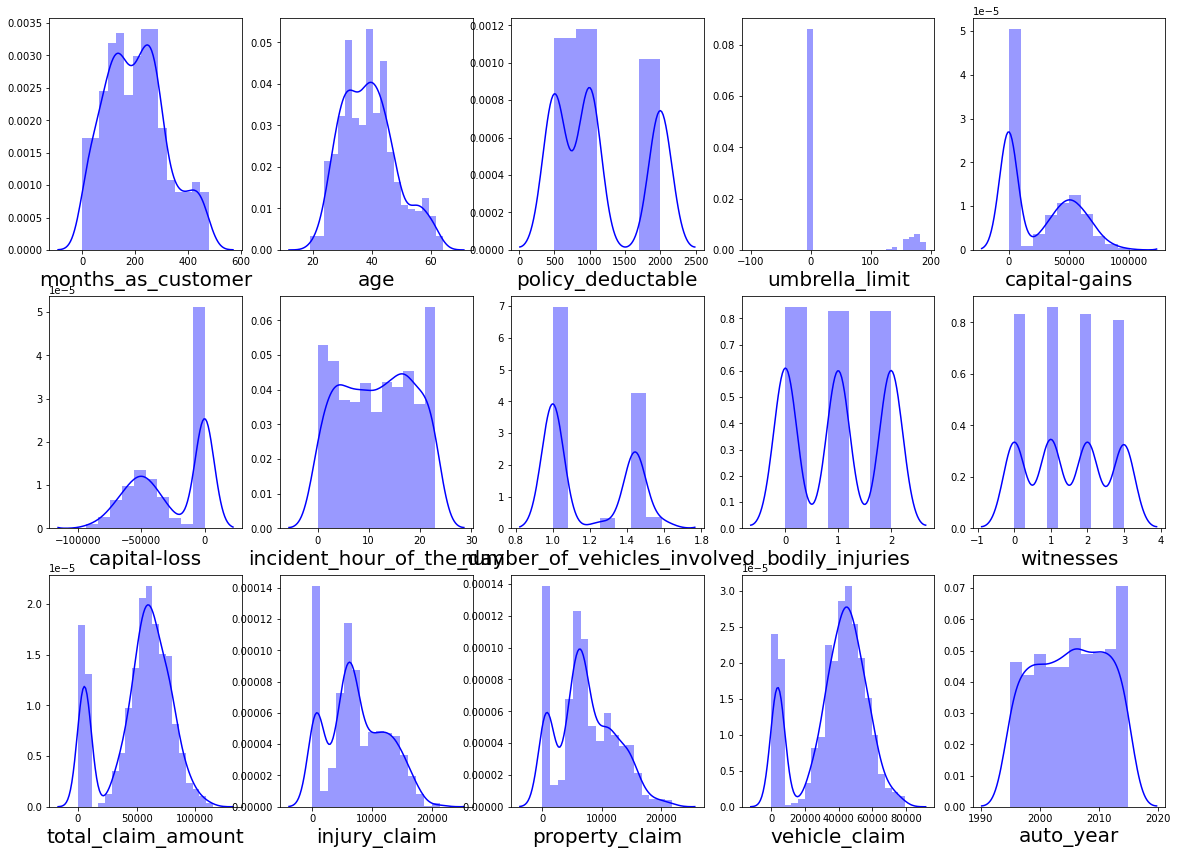

In [55]:
plt.figure(figsize = (20,35))
plot_number = 1
for i in x1:
    if plot_number <=31:
        plt.subplot(7,5,plot_number)
        sns.distplot(x1[i], color = 'blue')
        plt.xlabel(i,fontsize = 20)
    plot_number+=1
plt.show()

From these distribution plots, We can observe significant skewness is corrected and most of the columns data are normally distributed

### Merged the Skewness Corrected data with orignal data

In [56]:
drop_index = df.index.difference(x1.index)
df.drop(drop_index,inplace = True)
df.reset_index(drop=True,inplace = True)
df.shape

(983, 34)

### Feature and Target Selection

In [57]:
x = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']
y.value_counts()

0    742
1    241
Name: fraud_reported, dtype: int64

### Applying Standard Scaler in order to check the Multicollinearity

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[ 1.07245795,  0.98604365,  1.18233705, ...,  0.85062198,
        -1.64246755, -0.18996904],
       [ 0.20536729,  0.33230203, -0.02205396, ...,  0.35453097,
        -0.65283189,  0.30888999],
       [-0.60969793, -1.08413814,  1.18233705, ..., -0.63765107,
         0.96657193,  0.30888999],
       ...,
       [-0.64438156, -0.53935346,  1.18233705, ...,  1.09866749,
        -0.02306374, -1.52025979],
       [ 2.19967581,  2.51144076, -1.22644496, ..., -1.38178759,
        -1.28260003, -1.1876871 ],
       [ 2.182334  ,  2.29352689,  1.18233705, ...,  0.35453097,
        -0.65283189,  0.30888999]])

### Obtain Multicollinearity using Variance Inflation Factor

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Columns"] = x.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Columns,vif
0,months_as_customer,6.895462
1,age,6.912643
2,policy_state,1.028911
3,policy_csl,1.024985
4,policy_deductable,1.039664
5,umbrella_limit,1.035908
6,insured_sex,1.021816
7,insured_education_level,1.039483
8,insured_occupation,1.012391
9,insured_hobbies,1.046953


### Selecting KBest Features

In [60]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func = f_classif, k = 30)
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)

In [61]:
best_fit = best_features.fit(x,y)
scores = pd.DataFrame(best_fit.scores_)
columns = pd.DataFrame(x.columns)
columns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Features', 'Scores']
print(featureScores.nlargest(33,'Scores'))

                       Features      Scores
16            incident_severity  189.911593
29                vehicle_claim   29.501764
26           total_claim_amount   27.318237
28               property_claim   19.945459
15               collision_type   11.285521
27                 injury_claim    8.008395
13                incident_date    3.299903
18               incident_state    2.628940
24                    witnesses    2.363778
9               insured_hobbies    2.143836
21  number_of_vehicles_involved    2.115560
17        authorities_contacted    2.003445
5                umbrella_limit    1.932134
14                incident_type    1.823302
19                incident_city    1.656928
23              bodily_injuries    1.437923
2                  policy_state    1.262364
3                    policy_csl    0.892911
10         insured_relationship    0.855660
22              property_damage    0.834964
30                    auto_make    0.795880
25      police_report_available 

After reviewing Best Features Scores, found auto_model, insured_occupation, incident_hour_of_the_day has the least scores and also these have the less correlationship. However, after analyzing the model accuracy with these dropped column, it was observed that similar accuaracy was obtained so proceeding with this column.

In [62]:
x_best = x.copy()

In [63]:
x_best

,months_as_customer,age,policy_state,policy_csl,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,2,1,1000,0,1,4,2,17,...,1,2,2,71610,6510,13020,52080,10,1,2004
1,228,42,1,1,2000,5000000,1,4,6,15,...,0,0,0,5070,780,780,3510,8,12,2007
2,134,29,2,0,2000,5000000,0,6,11,2,...,2,3,1,34650,7700,3850,23100,4,30,2007
3,256,41,0,1,2000,6000000,0,6,1,2,...,1,2,1,63400,6340,6340,50720,3,34,2014
4,228,44,0,2,1000,6000000,1,0,11,2,...,0,1,1,6500,1300,650,4550,0,31,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,3,38,2,2,1000,0,0,5,2,13,...,0,1,0,87200,17440,8720,61040,6,6,2006
979,285,41,0,0,1000,0,0,6,9,17,...,2,3,0,108480,18080,18080,72320,13,28,2015
980,130,34,2,1,500,3000000,0,5,1,3,...,2,3,2,67500,7500,7500,52500,11,19,1996
981,458,62,0,2,2000,5000000,1,0,5,0,...,0,1,2,46980,5220,5220,36540,1,5,1998


## Modelling : Classification Problem

### Finding the best random state

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .33, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8061538461538461 on random_state: 32


In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score as cv
lrc= LogisticRegression(solver='liblinear')
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)
accuracy_lrc = classification_report(y_test,lrc_pred)
confusion_matrix_lrc = confusion_matrix(y_test,lrc_pred)
cv_lrc=cv(lrc,x,y,cv=5).mean()
roc_lrc=roc_auc_score(y_test,lrc_pred)


In [73]:
confusion_matrix_lrc

array([[247,   0],
       [ 58,   0]], dtype=int64)

In [74]:
print(accuracy_lrc)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       247
           1       0.00      0.00      0.00        58

    accuracy                           0.81       305
   macro avg       0.40      0.50      0.45       305
weighted avg       0.66      0.81      0.72       305



In [75]:
print(cv_lrc)

0.7528022376463275


In [76]:
print(roc_lrc)

0.5


Difference= 81 - 75.28 = 5.72

## Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
accuracy_rfc = classification_report(y_test,rfc_pred)
confusion_matrix_rfc = confusion_matrix(y_test,rfc_pred)
cv_rfc=cv(rfc,x,y,cv=5).mean()
roc_rfc=roc_auc_score(y_test,rfc_pred)


In [79]:
confusion_matrix_rfc

array([[218,  29],
       [ 27,  31]], dtype=int64)

In [80]:
print(accuracy_rfc)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       247
           1       0.52      0.53      0.53        58

    accuracy                           0.82       305
   macro avg       0.70      0.71      0.71       305
weighted avg       0.82      0.82      0.82       305



In [81]:
print(cv_rfc)

0.769092510100487


In [82]:
print(roc_rfc)

0.7085369258690493


Difference= 82-77 = 5

## Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
accuracy_dtc = classification_report(y_test,dtc_pred)
confusion_matrix_dtc = confusion_matrix(y_test,dtc_pred)
cv_dtc=cv(dtc,x,y,cv=5).mean()
roc_dtc=roc_auc_score(y_test,dtc_pred)


In [84]:
confusion_matrix_dtc

array([[203,  44],
       [ 25,  33]], dtype=int64)

In [85]:
print(accuracy_dtc)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       247
           1       0.43      0.57      0.49        58

    accuracy                           0.77       305
   macro avg       0.66      0.70      0.67       305
weighted avg       0.80      0.77      0.79       305



In [86]:
print(cv_dtc)

0.7864083704547808


In [87]:
print(roc_dtc)

0.6954139327097585


Difference = 77-78.64 = -1.64

## Support Vector Classifier

In [89]:
from sklearn.svm import SVC
sv= SVC()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
accuracy_sv = classification_report(y_test,sv_pred)
confusion_matrix_sv = confusion_matrix(y_test,sv_pred)
cv_sv=cv(sv,x,y,cv=5).mean()
roc_sv=roc_auc_score(y_test,sv_pred)

In [90]:
confusion_matrix_sv

array([[247,   0],
       [ 58,   0]], dtype=int64)

In [91]:
print(accuracy_sv)

              precision    recall  f1-score   support

           0       0.81      1.00      0.89       247
           1       0.00      0.00      0.00        58

    accuracy                           0.81       305
   macro avg       0.40      0.50      0.45       305
weighted avg       0.66      0.81      0.72       305



In [92]:
print(cv_sv)

0.7548326944991194


In [93]:
print(roc_sv)

0.5


Differrence = 81 - 75.48 = 5.52 

## KNeighbors Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
accuracy_knn = classification_report(y_test,knn_pred)
confusion_matrix_knn = confusion_matrix(y_test,knn_pred)
cv_knn=cv(knn,x,y,cv=5).mean()
roc_knn=roc_auc_score(y_test,knn_pred)

In [95]:
confusion_matrix_knn

array([[222,  25],
       [ 48,  10]], dtype=int64)

In [96]:
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       247
           1       0.29      0.17      0.22        58

    accuracy                           0.76       305
   macro avg       0.55      0.54      0.54       305
weighted avg       0.72      0.76      0.74       305



In [97]:
print(cv_knn)

0.7039883973894127


In [98]:
print(roc_knn)

0.5355996091023315


Difference = 76 - 70.4 = 5.6

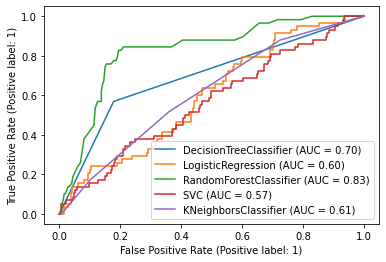

In [99]:
disp = plot_roc_curve(dtc,x_test,y_test)
mod = [lrc,rfc,sv,knn]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Upon reviewing the difference between Accuracy and cross validation score, Random Forest Classifier Model ranks with least difference. Additionally Random Forest Classifier has best AUC score compared to SVC, DTC and KNN method therefore we will choose Random Forest Classifier as Best Model and proceeding with Hyper Paramater tuning.

## Hyper Parameter Tuning using GridSearch

### Defining the Parameters list for Random Forest Classifier

In [100]:
parameters = {'ccp_alpha': np.array([0.5,0.05,0.005,0.0005,1,0.1,0.01]),
             'bootstrap': [True,False],
             'criterion': ["gini","entropy"],
             'max_depth': [300,150],
             'max_features': ["auto","sqrt"]}

In [101]:
from sklearn.model_selection import GridSearchCV
GridCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1,verbose=2)

In [102]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'ccp_alpha': array([5.e-01, 5.e-02, 5.e-03, 5.e-04, 1.e+00, 1.e-01, 1.e-02]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [300, 150],
                         'max_features': ['auto', 'sqrt']},
             verbose=2)

In [103]:
GridCV.best_params_

{'bootstrap': False,
 'ccp_alpha': 0.01,
 'criterion': 'entropy',
 'max_depth': 300,
 'max_features': 'sqrt'}

## Training the model with best parameters

In [104]:
Best_model = RandomForestClassifier(ccp_alpha = 0.0005, bootstrap = True, criterion = 'gini', max_depth = 300, max_features = 'sqrt')
Best_model.fit(x_train,y_train)
pred_rfc_bm = Best_model.predict(x_test)
accuracy_rfc_bm = accuracy_score(y_test,pred_rfc_bm)
print(accuracy_rfc_bm*100)

79.67213114754098


## Got 79.67% accuracy for the model

## Saving the model

In [109]:
import joblib
joblib.dump(Best_model,"Insurance_Claim_Fraud_Detection.pkl")

['Insurance_Claim_Fraud_Detection.pkl']